# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
## 1) Is the distribution of the body temperatures normal?

Text(0,0.5,'temperature')

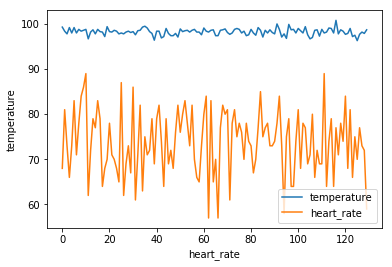

In [4]:
df.plot()
plt.xlabel('heart_rate')
plt.ylabel('temperature')

In [5]:
## 2) Is the sample size large? Are the observations independent?
    # Yes, the sample size sizes are large and independent

In [6]:
df.info() ## 130 values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [7]:
## 3) Is the true population mean really 98.6 degrees F?
    # The true popultion mean is actually 98.249
   ## See code below
      # Would you use a one-sample or two-sample test? Why?
    
     #In this situation, is it appropriate to use the  tt  or  zz  statistic?
        # It would be better  to use the zz statisitc because the sample size is above 30 and standard deviaiton is known
        
     #Now try using the other test. How is the result be different? Why?

In [8]:
df.describe() ## Calculated mean is 98.249

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [9]:
temperatures = df.temperature

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [11]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [12]:

shifted_temperature = temperatures - np.mean(temperatures) + 98.6


bs_replicates = draw_bs_reps(shifted_temperature, np.mean, 10000)


p = np.sum(bs_replicates <= np.mean(temperatures)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


(array([1.000e+00, 7.000e+00, 1.200e+01, 4.700e+01, 1.140e+02, 2.960e+02,
        4.610e+02, 7.890e+02, 1.073e+03, 1.379e+03, 1.468e+03, 1.377e+03,
        1.109e+03, 7.940e+02, 5.300e+02, 2.740e+02, 1.660e+02, 6.600e+01,
        2.900e+01, 8.000e+00]),
 array([98.35076923, 98.37426923, 98.39776923, 98.42126923, 98.44476923,
        98.46826923, 98.49176923, 98.51526923, 98.53876923, 98.56226923,
        98.58576923, 98.60926923, 98.63276923, 98.65626923, 98.67976923,
        98.70326923, 98.72676923, 98.75026923, 98.77376923, 98.79726923,
        98.82076923]),
 <a list of 20 Patch objects>)

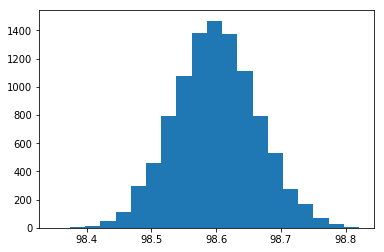

In [13]:
plt.hist(x=bs_replicates, bins=20)

In [14]:
## The mean tempature is not 98.6 based on the results of the p value 

In [15]:
stats.ttest_1samp(temperatures, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [16]:
## The mean tempature is not 98.6 based on the results of the p value 

In [17]:
mean = np.mean(temperatures)
std= np.std(temperatures)
length = len(temperatures)

In [18]:
z_first = (mean-98.6)/(std/np.sqrt(length))

In [19]:
z_first

-5.475925202078116

In [21]:
(stats.norm.cdf(z_first)) * 2

4.3523151658821886e-08

In [22]:
## 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
    # Which one is the correct one to use?
   # What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?


In [23]:
sample_temp = temperatures.sample(10)

In [24]:
print (sample_temp)

80      98.8
38      97.9
45      97.9
48      97.9
68      98.7
91     100.0
82      97.5
108     98.7
63      98.6
2       97.8
Name: temperature, dtype: float64


In [25]:
# Make an array of translated impact forces: 
shifted_sample = sample_temp - np.mean(sample_temp) + 98.6


bs_replicates = draw_bs_reps(shifted_sample, np.mean, 10000)

# Compute fraction of replicates that are less than the observed value: p
p = np.sum(bs_replicates <= np.mean(sample_temp)) / 10000

# Print the p-value
print('p = ', p)

p =  0.1686


In [26]:
stats.ttest_1samp(sample_temp, 98.6)

Ttest_1sampResult(statistic=-0.9471191035849774, pvalue=0.36831237823209073)

In [27]:
mean_samp = np.mean(sample_temp)
std_samp = np.std(sample_temp)
length_samp = len(sample_temp)

In [28]:
z = (mean-98.6)/(std/np.sqrt(length))

In [29]:
print(z)

-5.475925202078116


In [30]:
## Because the sample size is less then 30 it makes more sense to t-test we can see that the tstatistic provides a value closer to the actual mean 

In [31]:
#5)At what temperature should we consider someone's temperature to be "abnormal"?
   #As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
  #Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [32]:
abnormal_valuesone= (1.96 * std) + mean 
abnormal_valuestwo= mean - (1.96 * std)

In [33]:
print (abnormal_valuesone, abnormal_valuestwo)

99.68073201588466 96.8177295225769


In [34]:
shifted_temperature = temperatures - np.mean(temperatures) + abnormal_valuesone

bs_replicates = draw_bs_reps(shifted_temperature, np.mean, 10000)


p = np.sum(bs_replicates <= np.mean(temperatures)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


In [35]:
shifted_temperature = temperatures - np.mean(temperatures) + abnormal_valuestwo

bs_replicates = draw_bs_reps(shifted_temperature, np.mean, 10000)


p = np.sum(bs_replicates <= np.mean(temperatures)) / 10000

# Print the p-value
print('p = ', p)

p =  1.0


In [36]:
confidence_interval_one = mean_samp + (1.96 * std_samp)/ math.sqrt(len(sample_temp))
confidence_interval_two = mean_samp - (1.96 * std_samp)/ math.sqrt(len(sample_temp))

In [37]:
print(confidence_interval_one, confidence_interval_two)

98.81191213921353 97.94808786078649


In [38]:
margin_of_error= z * len(sample_temp)

In [39]:
# Statistic will be within 8 percentage points of the real population value 95% of the time

In [40]:
# 6) Is there a significant difference between males and females in normal temperature?
 # What testing approach did you use and why?
 #Write a story with your conclusion in the context of the original problem.

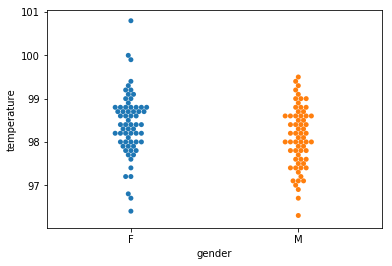

In [41]:
sns.swarmplot(df.gender, df.temperature)

In [42]:
m = df[df.gender == 'M']['temperature']
f = df[df.gender == 'F']['temperature']

In [43]:
print (np.mean(m), np.mean(f))

98.1046153846154 98.39384615384613


In [44]:
two_sample = stats.ttest_ind(m, f)

In [45]:
print(two_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


In [ ]:
## From this data there are a few thinngs that can be concluded. 
## First, is that the notion that the mean or average temperature of human is 98.6 is False. 
##Second we can note that depedning on the selected confidence interval, abnormal values may vary. 
## Finally, we can see that there are clear discrepencies between average male and female temperatures